## Elliott Wave and Fibonacci Retracement Indicators to Surf the Crypto Waves
<hr /> 

Utilization of Fibonacci Golden Ratio __Φ__, standard deviation, exponentially weighted moving average, daily returns, and covariance to identify the upswing and downswing momentums of high volatility cryptocurrency, Solanas USD, to be later utilized as buy triggers or stop-loss triggers. 

### Part I 
> Import and creation of Solanas USD pricing data (from January 2020 to April 2022) from Binance.

In [1]:
# Imports of key OS and API libraries and packages
import os 
from dotenv import load_dotenv
import requests
from binance import Client

# Imports of Pandas and related packages
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

In [2]:
# Setting up Binance API keys and client for data endpoints
load_dotenv()
BINANCE_API_KEY=os.getenv('BINANCE_API_KEY')
BINANCE_SECRET_KEY=os.getenv('BINANCE_SECRET_KEY')
client = Client(BINANCE_API_KEY, BINANCE_SECRET_KEY, tld='us')

In [3]:
# Fetching Solanas USD data from January 2020 to April 2022 for the interval of 1-Day
klines = client.get_historical_klines("SOLUSD", Client.KLINE_INTERVAL_1DAY, "01 Jan, 2020", "30 Apr, 2022")

# Converting into a Dataframe
klines_df = pd.DataFrame(klines)

# Renaming columns to their correct labels
klines_df.columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'NaN']

# Converting open_time and close_time data values to date-time format
klines_df['open_time'] = pd.to_datetime(klines_df['open_time'], unit='ms')
klines_df['close_time'] = pd.to_datetime(klines_df['close_time'], unit='ms')

# Dropping last column NaN
klines_df.drop(columns='NaN', inplace=True)

# Display Dataframe
klines_df

open_time      open      high      low    close          volume  \
0   2020-09-18    3.0888    3.2926   2.8050   3.1002  41039.60000000   
1   2020-09-19    3.1002    3.2616   2.9846   3.0076  19297.28000000   
2   2020-09-20    3.0042    3.0042   2.7550   2.8737  21274.03000000   
3   2020-09-21    2.9110    3.0337   2.5500   2.7795  19867.49000000   
4   2020-09-22    2.7378    3.0089   2.6593   2.9629  58835.67000000   
..         ...       ...       ...      ...      ...             ...   
585 2022-04-26  100.9758  102.0976  94.6210  95.7159  74880.17000000   
586 2022-04-27   95.7381  100.7525  94.9235  98.3570  65655.07000000   
587 2022-04-28   98.3136  100.5527  96.3708  98.2014  68097.56000000   
588 2022-04-29   98.2356   98.7000  92.3313  93.9566  73629.15000000   
589 2022-04-30   93.9642   94.9265  82.0000  84.6466  85243.86000000   

                 close_time quote_asset_volume  number_of_trades  \
0   2020-09-18 23:59:59.999        124683.8036               714   
1   2020-09-19 23:59:59.999         59744.3755               686   
2   2020-09-20 23:59:59.999         60928.1154               387   
3   2020-09-21 23:59:59.999         55417.0202               345   
4   2020-09-22 23:59:59.999        168942.4414               435   
..                      ...                ...               ...   
585 2022-04-26 23:59:59.999       7365647.2794             21625   
586 2022-04-27 23:59:59.999       6438104.7141             21021   
587 2022-04-28 23:59:59.999       6712283.8881             19725   
588 2022-04-29 23:59:59.999       7004742.3399             17715   
589 2022-04-30 23:59:59.999       7594495.9398             19590   

    taker_buy_base_asset_volume taker_buy_quote_asset_volume  
0                26548.92000000                   81833.3694  
1                 7902.23000000                   24579.4758  
2                 7266.20000000                   20715.0029  
3                10019.54000000                   28579.9558  
4                12448.52000000                   35901.7861  
..                          ...                          ...  
585              38473.68000000                 3785026.9001  
586              33831.09000000                 3317102.8450  
587              33666.71000000                 3319913.7655  
588              37734.88000000                 3589963.9147  
589              37490.54000000                 3337908.6490  

[590 rows x 11 columns]

In [4]:
# Fixing datatype to replace closing price, open price, high, low and volume from an object to a float
klines_df['close'] = klines_df['close'].str.replace('','')
klines_df['close'] = klines_df['close'].astype('float')

klines_df['open'] = klines_df['open'].str.replace('','')
klines_df['open'] = klines_df['open'].astype('float')

klines_df['high'] = klines_df['high'].str.replace('','')
klines_df['high'] = klines_df['high'].astype('float')

klines_df['low'] = klines_df['low'].str.replace('','')
klines_df['low'] = klines_df['low'].astype('float')

klines_df['volume'] = klines_df['volume'].str.replace('','')
klines_df['volume'] = klines_df['volume'].astype('float')

klines_df['number_of_trades'] = klines_df['number_of_trades'].astype('float')

klines_df['quote_asset_volume'] = klines_df['quote_asset_volume'].str.replace('','')
klines_df['quote_asset_volume'] = klines_df['quote_asset_volume'].astype('float')

klines_df['taker_buy_base_asset_volume'] = klines_df['taker_buy_base_asset_volume'].str.replace('','')
klines_df['taker_buy_base_asset_volume'] = klines_df['taker_buy_base_asset_volume'].astype('float')

klines_df['taker_buy_quote_asset_volume'] = klines_df['taker_buy_quote_asset_volume'].str.replace('','')
klines_df['taker_buy_quote_asset_volume'] = klines_df['taker_buy_quote_asset_volume'].astype('float')

klines_df.dtypes

open_time                       datetime64[ns]
open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                 float64
close_time                      datetime64[ns]
quote_asset_volume                     float64
number_of_trades                       float64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
dtype: object

## Part II 
> Visual inspection of data relationships through plots

#### Candlestick plot of SOLUSD trading movements from January of 2020 to April of 2022

In [5]:
# Candlestick plot of SOLUSD trading movements
sol_trades_fig = go.Figure(data=[go.Candlestick(x=klines_df['open_time'],
                open=klines_df['open'],
                high=klines_df['high'],
                low=klines_df['low'],
                close=klines_df['close'])])

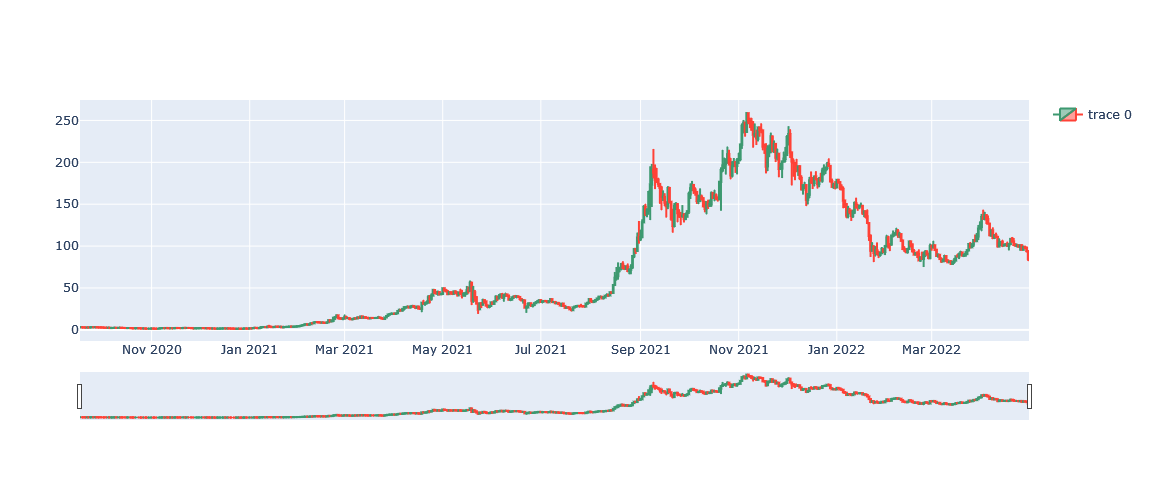

In [6]:
sol_trades_fig.update_layout(height=500, showlegend=True)
sol_trades_fig.show()

From the candlestick time series plot of the SOLUSD trade activities, we can identify the start of upswing and the beginning of mass market trading activities to be sometime around July to August of 2021. 

<hr />

#### Correlation matrix and heatmap of data features

In [7]:
# Creating a correlation analysis specific dataframe
klines_df_corr = klines_df.drop(columns=['open_time','close_time'])
klines_df_corr = klines_df_corr.round(decimals=2)
klines_df_corr

open    high    low  close    volume  quote_asset_volume  \
0      3.09    3.29   2.80   3.10  41039.60           124683.80   
1      3.10    3.26   2.98   3.01  19297.28            59744.38   
2      3.00    3.00   2.76   2.87  21274.03            60928.12   
3      2.91    3.03   2.55   2.78  19867.49            55417.02   
4      2.74    3.01   2.66   2.96  58835.67           168942.44   
..      ...     ...    ...    ...       ...                 ...   
585  100.98  102.10  94.62  95.72  74880.17          7365647.28   
586   95.74  100.75  94.92  98.36  65655.07          6438104.71   
587   98.31  100.55  96.37  98.20  68097.56          6712283.89   
588   98.24   98.70  92.33  93.96  73629.15          7004742.34   
589   93.96   94.93  82.00  84.65  85243.86          7594495.94   

     number_of_trades  taker_buy_base_asset_volume  \
0               714.0                     26548.92   
1               686.0                      7902.23   
2               387.0                      7266.20   
3               345.0                     10019.54   
4               435.0                     12448.52   
..                ...                          ...   
585           21625.0                     38473.68   
586           21021.0                     33831.09   
587           19725.0                     33666.71   
588           17715.0                     37734.88   
589           19590.0                     37490.54   

     taker_buy_quote_asset_volume  
0                        81833.37  
1                        24579.48  
2                        20715.00  
3                        28579.96  
4                        35901.79  
..                            ...  
585                    3785026.90  
586                    3317102.84  
587                    3319913.77  
588                    3589963.91  
589                    3337908.65  

[590 rows x 9 columns]

In [8]:
# Correlations matrix of SOLUSD features
klines_df_corr.corr()

open      high       low     close  \
open                          1.000000  0.998216  0.997765  0.996590   
high                          0.998216  1.000000  0.997150  0.998699   
low                           0.997765  0.997150  1.000000  0.997670   
close                         0.996590  0.998699  0.997670  1.000000   
volume                        0.096148  0.123036  0.078849  0.108116   
quote_asset_volume            0.522507  0.550225  0.502919  0.534892   
number_of_trades              0.650372  0.675355  0.628542  0.660059   
taker_buy_base_asset_volume   0.104250  0.132333  0.088132  0.118358   
taker_buy_quote_asset_volume  0.527143  0.555943  0.508791  0.541654   

                                volume  quote_asset_volume  number_of_trades  \
open                          0.096148            0.522507          0.650372   
high                          0.123036            0.550225          0.675355   
low                           0.078849            0.502919          0.628542   
close                         0.108116            0.534892          0.660059   
volume                        1.000000            0.751086          0.662488   
quote_asset_volume            0.751086            1.000000          0.960847   
number_of_trades              0.662488            0.960847          1.000000   
taker_buy_base_asset_volume   0.997132            0.756013          0.669530   
taker_buy_quote_asset_volume  0.744959            0.999106          0.961958   

                              taker_buy_base_asset_volume  \
open                                             0.104250   
high                                             0.132333   
low                                              0.088132   
close                                            0.118358   
volume                                           0.997132   
quote_asset_volume                               0.756013   
number_of_trades                                 0.669530   
taker_buy_base_asset_volume                      1.000000   
taker_buy_quote_asset_volume                     0.752021   

                              taker_buy_quote_asset_volume  
open                                              0.527143  
high                                              0.555943  
low                                               0.508791  
close                                             0.541654  
volume                                            0.744959  
quote_asset_volume                                0.999106  
number_of_trades                                  0.961958  
taker_buy_base_asset_volume                       0.752021  
taker_buy_quote_asset_volume                      1.000000

We find that the prices have the highest correlation with number_of_trades from 0.628 to 0.675. Taker_buy_quote_asset_volume has the second highest correlation to prices followed by quote_asset_volume.

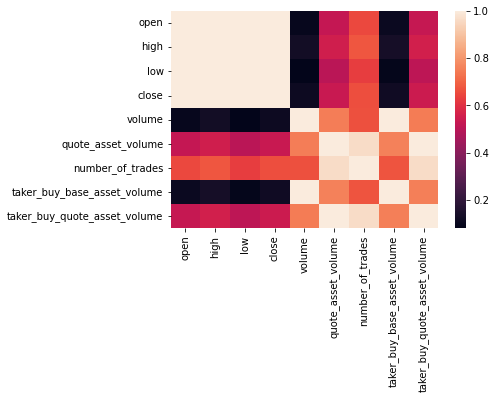

In [9]:
# Seaborn heatmap of correlations
sns.heatmap(klines_df_corr.corr());

#### Analyzing the exponentially weighted moving average. 

In [10]:
# Initializing index column of klines_df to open_time
klines_df.set_index('open_time', inplace=True)
klines_df.drop(columns='close_time', inplace=True)
klines_df = klines_df.round(decimals=2)

Utilizing the Fibonacci natural series 0,1,1,2,3,5,8,13, we will use 3, 8, and 13 consecutively, each 5 days apart, to capture a bracket of volatility movements for the data series to help us later identify the indicators for the swings.

<AxesSubplot:title={'center':'EWM of Solana'}, xlabel='open_time'>

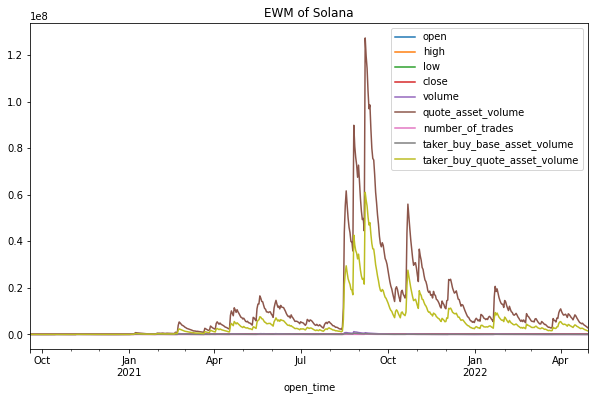

In [11]:
# Exponentially weighted moving average (std) with 3-day half-life
klines_ewm3 = klines_df.ewm(halflife=3).std().dropna()
klines_ewm3.plot(figsize=(10,6),title='EWM of Solana')

<AxesSubplot:title={'center':'EWM of Solana'}, xlabel='open_time'>

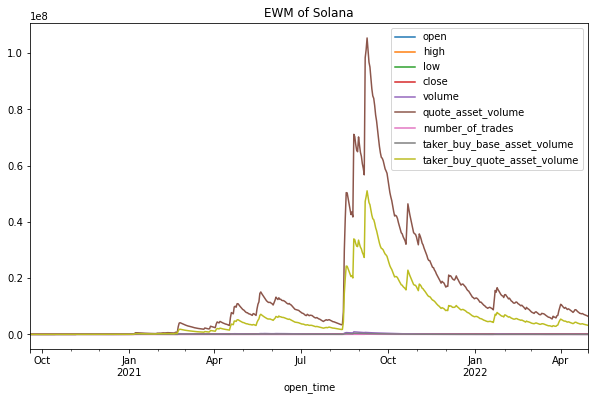

In [12]:
# Exponentially weighted moving average (std) with 8-day half-life
klines_ewm8 = klines_df.ewm(halflife=8).std().dropna()
klines_ewm8.plot(figsize=(10,6),title='EWM of Solana')

<AxesSubplot:title={'center':'EWM of Solana'}, xlabel='open_time'>

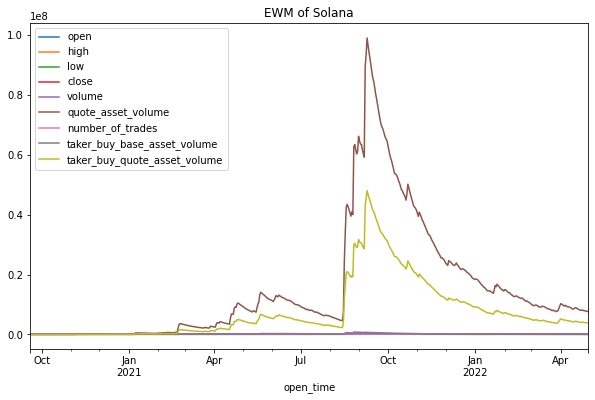

In [13]:
# Exponentially weighted moving average (std) with 13-day half-life
klines_ewm13 = klines_df.ewm(halflife=13).std().dropna()
klines_ewm13.plot(figsize=(10,6),title='EWM of Solana')

From these three plots of exponentialy weighted moving average, we found that the quote_asset_volume and taker_buy_quote_asset_volume closely resembles the movements of the prices. 

Note that the prices are not visible due to the differences in numbers. Next we will repeat the plots with just pricing movements. 

In [14]:
# Dropping the last five columns
new_klines_df = klines_df.drop(columns=['volume','quote_asset_volume','number_of_trades', 'taker_buy_base_asset_volume','taker_buy_quote_asset_volume'])
new_klines_df 

open    high    low  close
open_time                               
2020-09-18    3.09    3.29   2.80   3.10
2020-09-19    3.10    3.26   2.98   3.01
2020-09-20    3.00    3.00   2.76   2.87
2020-09-21    2.91    3.03   2.55   2.78
2020-09-22    2.74    3.01   2.66   2.96
...            ...     ...    ...    ...
2022-04-26  100.98  102.10  94.62  95.72
2022-04-27   95.74  100.75  94.92  98.36
2022-04-28   98.31  100.55  96.37  98.20
2022-04-29   98.24   98.70  92.33  93.96
2022-04-30   93.96   94.93  82.00  84.65

[590 rows x 4 columns]

<AxesSubplot:title={'center':'EWM of Solana'}, xlabel='open_time'>

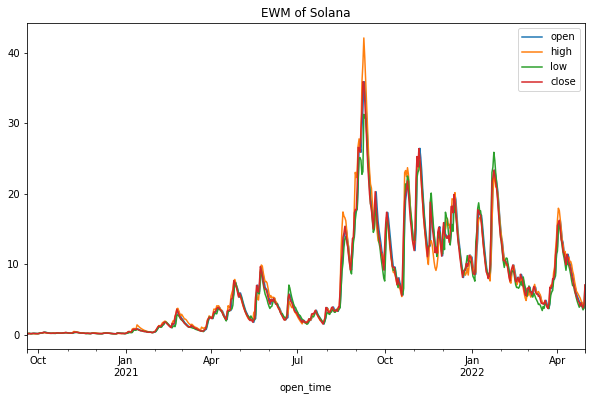

In [15]:
# Exponentially weighted moving average (std) with 3-day half-life
new_klines_ewm3 = new_klines_df.ewm(halflife=3).std().dropna()
new_klines_ewm3.plot(figsize=(10,6),title='EWM of Solana')

<AxesSubplot:title={'center':'EWM of Solana'}, xlabel='open_time'>

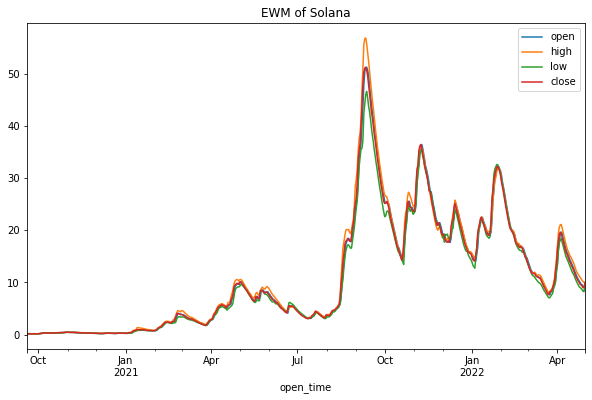

In [16]:
# Exponentially weighted moving average (std) with 8-day half-life
new_klines_ewm8 = new_klines_df.ewm(halflife=8).std().dropna()
new_klines_ewm8.plot(figsize=(10,6),title='EWM of Solana')

<AxesSubplot:title={'center':'EWM of Solana'}, xlabel='open_time'>

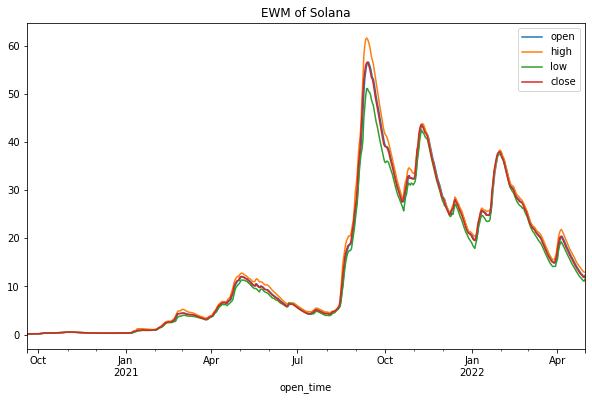

In [17]:
# Exponentially weighted moving average (std) with 13-day half-life
new_klines_ewm13 = new_klines_df.ewm(halflife=13).std().dropna()
new_klines_ewm13.plot(figsize=(10,6),title='EWM of Solana')

In [18]:
# Daily returns
sol_returns = new_klines_df.pct_change()
sol_returns

open      high       low     close
open_time                                         
2020-09-18       NaN       NaN       NaN       NaN
2020-09-19  0.003236 -0.009119  0.064286 -0.029032
2020-09-20 -0.032258 -0.079755 -0.073826 -0.046512
2020-09-21 -0.030000  0.010000 -0.076087 -0.031359
2020-09-22 -0.058419 -0.006601  0.043137  0.064748
...              ...       ...       ...       ...
2022-04-26  0.017944  0.005119  0.002331 -0.051620
2022-04-27 -0.051891 -0.013222  0.003171  0.027580
2022-04-28  0.026844 -0.001985  0.015276 -0.001627
2022-04-29 -0.000712 -0.018399 -0.041922 -0.043177
2022-04-30 -0.043567 -0.038197 -0.111881 -0.099085

[590 rows x 4 columns]

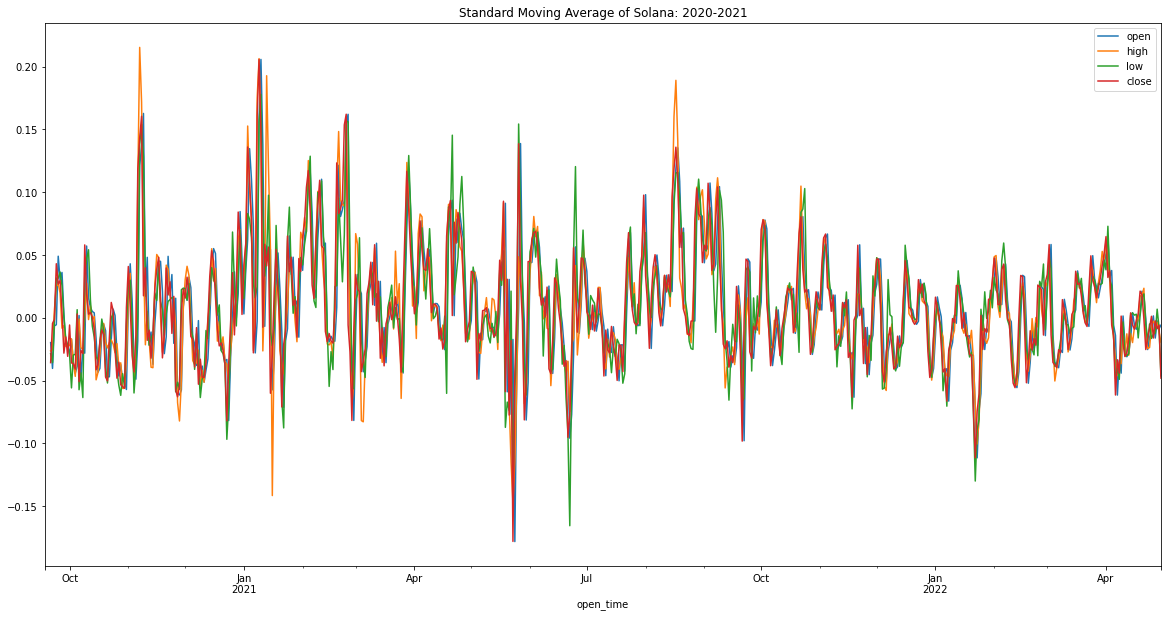

In [19]:
# Simple Moving Average
sol_sma3 = sol_returns.rolling(window=3).mean().plot(figsize=(20,10), title='Standard Moving Average of Solana: 2020-2021')

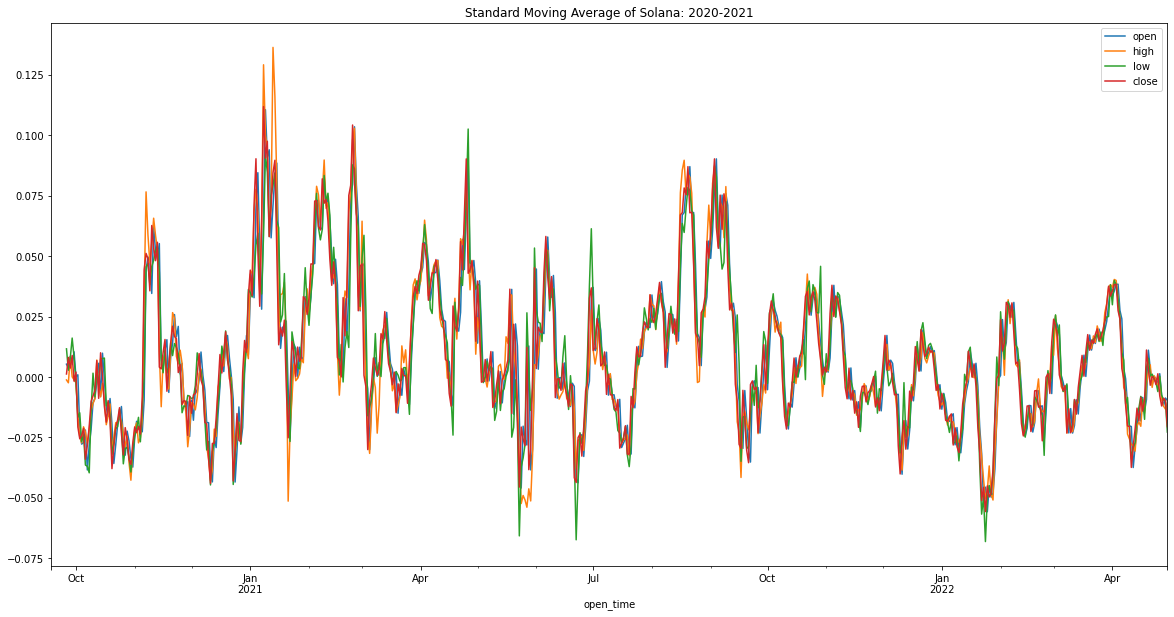

In [20]:
# Simple Moving Average
sol_sma8 = sol_returns.rolling(window=8).mean().plot(figsize=(20,10), title='Standard Moving Average of Solana: 2020-2021')

In [ ]:
# Simple Moving Average
sol_sma13= sol_returns.rolling(window=13).mean().plot(figsize=(20,10), title='Standard Moving Average of Solana: 2020-2021')

#### Covariance measurements to find how price move with the number of trade orders


### Part III 
Identifying indicators
